In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
tf.data.experimental.enable_debug_mode()

In [3]:
df = pd.read_csv('/home/alex/machine_learning_study/datasets/age_gender.csv')
df.drop('img_name', inplace=True, axis=1)
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df.shape

(23705, 4)

In [7]:
columns = ["age", "gender", "ethnicity"]
y = df.drop("pixels", axis=1)
X = df.drop(columns, axis=1)

In [8]:
X_input = np.array([]).reshape(-1, 48, 48, 1)
pixels = pd.Series(X['pixels'])
for i in range(int(df.shape[0]/100+1)):
    X1 = pixels[i*100:(i+1)*100].apply(lambda x:x.split(' '))
    X1 = X1.apply(lambda x:np.array(list(map(lambda z:int(z), x))))
    X1 = np.array(X1)
    X1 = np.stack(np.array(X1), axis=0)
    X1 = X1.reshape(-1, 48, 48, 1)
    X_input = np.concatenate((X_input, X1), axis=0)

(100, 48, 48, 1)
(200, 48, 48, 1)
(300, 48, 48, 1)
(400, 48, 48, 1)
(500, 48, 48, 1)
(600, 48, 48, 1)
(700, 48, 48, 1)
(800, 48, 48, 1)
(900, 48, 48, 1)
(1000, 48, 48, 1)
(1100, 48, 48, 1)
(1200, 48, 48, 1)
(1300, 48, 48, 1)
(1400, 48, 48, 1)
(1500, 48, 48, 1)
(1600, 48, 48, 1)
(1700, 48, 48, 1)
(1800, 48, 48, 1)
(1900, 48, 48, 1)
(2000, 48, 48, 1)
(2100, 48, 48, 1)
(2200, 48, 48, 1)
(2300, 48, 48, 1)
(2400, 48, 48, 1)
(2500, 48, 48, 1)
(2600, 48, 48, 1)
(2700, 48, 48, 1)
(2800, 48, 48, 1)
(2900, 48, 48, 1)
(3000, 48, 48, 1)
(3100, 48, 48, 1)
(3200, 48, 48, 1)
(3300, 48, 48, 1)
(3400, 48, 48, 1)
(3500, 48, 48, 1)
(3600, 48, 48, 1)
(3700, 48, 48, 1)
(3800, 48, 48, 1)
(3900, 48, 48, 1)
(4000, 48, 48, 1)
(4100, 48, 48, 1)
(4200, 48, 48, 1)
(4300, 48, 48, 1)
(4400, 48, 48, 1)
(4500, 48, 48, 1)
(4600, 48, 48, 1)
(4700, 48, 48, 1)
(4800, 48, 48, 1)
(4900, 48, 48, 1)
(5000, 48, 48, 1)
(5100, 48, 48, 1)
(5200, 48, 48, 1)
(5300, 48, 48, 1)
(5400, 48, 48, 1)
(5500, 48, 48, 1)
(5600, 48, 48, 1)
(

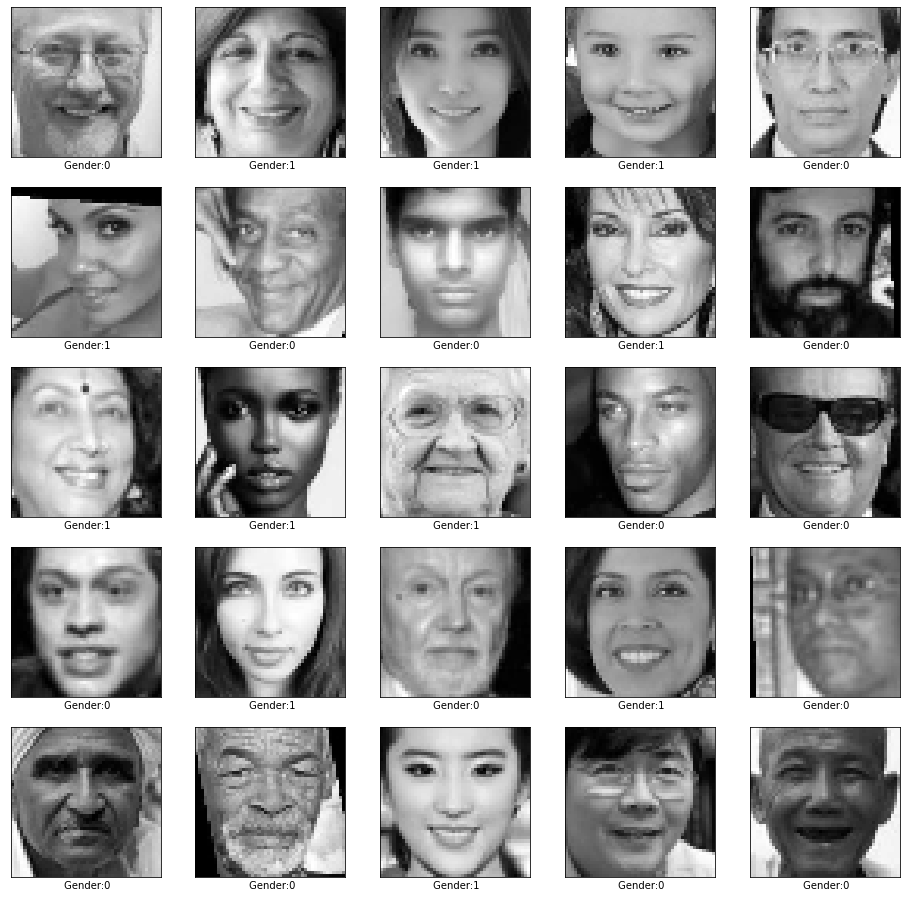

In [9]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_input[i], cmap='gray')
    plt.xlabel(" Gender:"+str(y['gender'].iloc[i]))
plt.show()

In [10]:
gender = np.array(y['gender'])
gender = to_categorical(gender, num_classes = 2)

In [12]:
X_input = X_input / 255

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_input, gender, random_state=2)

In [35]:
input_layer = Input((48,48,1))

x = Conv2D(filters = 48, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 48, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 96, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 96, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(192)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(2)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 48)        480       
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 48)       192       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 48)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 48)        20784     
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 48)       192       
 hNormalization)                                             

In [38]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [42]:
model.fit(X_train, 
          y_train,
          batch_size=32,
          epochs=30,
          shuffle=True,
          validation_data = (X_test, y_test))

Epoch 1/30
556/556 [==============================] - 99s 179ms/step - loss: 0.3041 - accuracy: 0.8709 - val_loss: 0.2883 - val_accuracy: 0.8757
Epoch 2/30
556/556 [==============================] - 100s 180ms/step - loss: 0.2704 - accuracy: 0.8861 - val_loss: 0.2737 - val_accuracy: 0.8822
Epoch 3/30
556/556 [==============================] - 99s 179ms/step - loss: 0.2476 - accuracy: 0.8974 - val_loss: 0.2789 - val_accuracy: 0.8841
Epoch 4/30
556/556 [==============================] - 100s 179ms/step - loss: 0.2287 - accuracy: 0.9052 - val_loss: 0.2705 - val_accuracy: 0.8870
Epoch 5/30
556/556 [==============================] - 100s 179ms/step - loss: 0.2086 - accuracy: 0.9138 - val_loss: 0.2883 - val_accuracy: 0.8831
Epoch 6/30
556/556 [==============================] - 98s 175ms/step - loss: 0.1894 - accuracy: 0.9233 - val_loss: 0.2862 - val_accuracy: 0.8780
Epoch 7/30
556/556 [==============================] - 99s 178ms/step - loss: 0.1773 - accuracy: 0.9276 - val_loss: 0.3010 - val

In [44]:
model.save('./face_model.h5')

In [16]:
model = load_model('./face_model.h5')

In [20]:
model.evaluate(X_test, y_test, batch_size=1000)

6/6 [==============================] - 6s 959ms/step - loss: 0.5100 - accuracy: 0.8883


[0.5099537968635559, 0.8883077502250671]

In [21]:
classes = np.array(['Male', 'Female'])
preds = model.predict(X_test)
preds_single = classes[np.argmax(preds, axis = -1)]
actual_single = classes[np.argmax(y_test, axis = -1)]

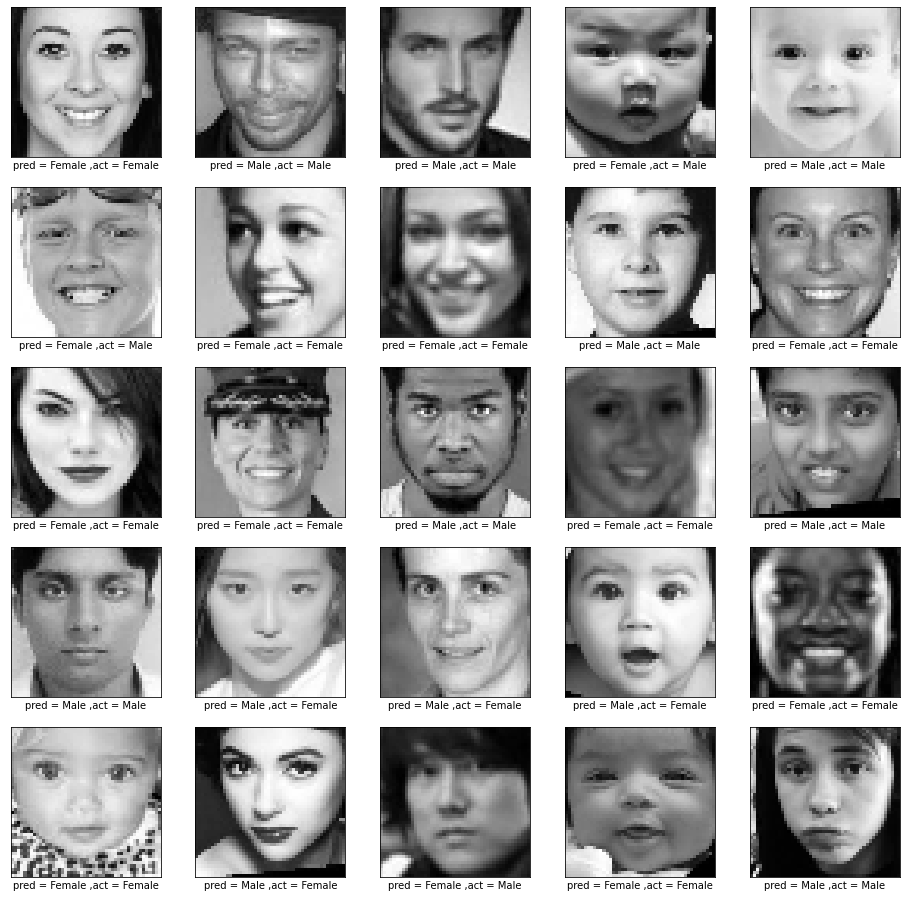

In [34]:
plt.figure(figsize=(16,16))
for i, a in zip(np.random.randint(0, len(X_test), 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel('pred = ' + str(preds_single[i]) + ' ,act = ' + str(actual_single[i]))
plt.show()